In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots


###### Cодержание колонок регрессоров и колонки зависимой величины (B):

###### 9 columns

###### 25 rows

###### Index

###### A0, 1

###### A1, the maximum ground temperature,

###### A2, the minimum ground temperature,

###### A3, an index for the daily average ground temperature,

###### A4, the maximum air temperature,

###### A5, the minimum air temperature,

###### A6, an index for the daily average air temperature,

###### B, the daily quantity of evaporated water.

### Импорт и тд:

In [5]:
import pandas as pd
data = pd.read_table('table.csv', sep=';')


In [6]:
data.columns = ['I','A0','A1','A2','A3','A4','A5','A6','B']


In [7]:
new_row = {'I':1,'A0':1,'A1':84,'A2':65,'A3':149,'A4':86,'A5':61,'A6':159,'B':34}


In [8]:
print(data)


     I  A0  A1  A2   A3  A4  A5   A6   B
0    2   1  79  66  142  83  64  152  33
1    3   1  81  67  147  83  65  158  26
2    4   1  84  68  167  88  69  180  41
3    5   1  74  66  131  77  67  147   4
4    6   1  73  66  131  78  69  159   5
5    7   1  75  67  134  84  68  159  20
6    8   1  84  68  161  89  71  195  31
7    9   1  86  72  169  91  76  206  38
8   10   1  88  73  178  91  76  208  43
9   11   1  90  74  187  94  76  211  47
10  12   1  88  72  171  94  75  211  45
11  13   1  88  72  171  92  70  201  45
12  14   1  81  69  154  87  68  167  11
13  15   1  79  68  149  83  68  162  10
14  16   1  84  69  160  87  66  173  30
15  17   1  84  70  160  87  68  177  29
16  18   1  84  70  168  88  70  169  23
17  19   1  77  67  147  83  66  170  16
18  20   1  87  67  166  92  67  196  37
19  21   1  89  69  171  92  72  199  50
20  22   1  89  72  180  94  72  204  36
21  23   1  93  72  186  92  73  201  54
22  24   1  93  74  188  93  72  206  44
23  25   1  84  

In [9]:
del data['I']

In [10]:
del data['A0']

In [11]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      24 non-null     int64
 1   A2      24 non-null     int64
 2   A3      24 non-null     int64
 3   A4      24 non-null     int64
 4   A5      24 non-null     int64
 5   A6      24 non-null     int64
 6   B       24 non-null     int64
dtypes: int64(7)
memory usage: 1.4 KB


In [12]:
data.describe()

,A1,A2,A3,A4,A5,A6,B
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,83.916667,69.291667,161.041667,87.791667,69.458333,181.750000,31.166667
std,5.625382,2.742249,17.228589,4.951760,4.159632,22.004446,14.372881
min,73.000000,65.000000,131.000000,77.000000,59.000000,147.000000,4.000000
25%,80.500000,67.000000,147.000000,83.750000,67.000000,161.250000,22.250000
50%,84.000000,69.000000,163.500000,88.000000,69.000000,178.500000,32.000000
75%,88.000000,72.000000,171.000000,92.000000,72.000000,201.750000,43.250000
max,93.000000,74.000000,188.000000,94.000000,76.000000,211.000000,54.000000


### Делим датасет на тренировочный и тестовый, в соотношении 70:30:

In [13]:
from sklearn.model_selection import train_test_split
y= data['B']
x=data.drop('B',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [14]:
print(x_train)

    A1  A2   A3  A4  A5   A6
4   73  66  131  78  69  159
18  87  67  166  92  67  196
5   75  67  134  84  68  159
16  84  70  168  88  70  169
12  81  69  154  87  68  167
9   90  74  187  94  76  211
17  77  67  147  83  66  170
6   84  68  161  89  71  195
14  84  69  160  87  66  173
8   88  73  178  91  76  208
3   74  66  131  77  67  147
19  89  69  171  92  72  199
2   84  68  167  88  69  180
13  79  68  149  83  68  162
15  84  70  160  87  68  177
0   79  66  142  83  64  152


In [15]:
print(x_test)

    A1  A2   A3  A4  A5   A6
23  84  65  147  85  59  151
21  93  72  186  92  73  201
10  88  72  171  94  75  211
7   86  72  169  91  76  206
20  89  72  180  94  72  204
11  88  72  171  92  70  201
1   81  67  147  83  65  158
22  93  74  188  93  72  206


In [16]:
print(data)

    A1  A2   A3  A4  A5   A6   B
0   79  66  142  83  64  152  33
1   81  67  147  83  65  158  26
2   84  68  167  88  69  180  41
3   74  66  131  77  67  147   4
4   73  66  131  78  69  159   5
5   75  67  134  84  68  159  20
6   84  68  161  89  71  195  31
7   86  72  169  91  76  206  38
8   88  73  178  91  76  208  43
9   90  74  187  94  76  211  47
10  88  72  171  94  75  211  45
11  88  72  171  92  70  201  45
12  81  69  154  87  68  167  11
13  79  68  149  83  68  162  10
14  84  69  160  87  66  173  30
15  84  70  160  87  68  177  29
16  84  70  168  88  70  169  23
17  77  67  147  83  66  170  16
18  87  67  166  92  67  196  37
19  89  69  171  92  72  199  50
20  89  72  180  94  72  204  36
21  93  72  186  92  73  201  54
22  93  74  188  93  72  206  44
23  84  65  147  85  59  151  30


### График совместного распределения зависимой величины и какого-либо регрессора:

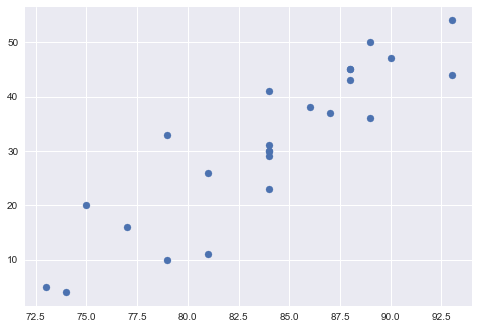

In [17]:

plt.scatter(data['A1'], data['B'])
plt.show()

###### В данном случае наблюдается тренд, что вроде не очень хорошо(?)

### Гистограмма для проверки нормальности распределения зависимой величины:

(array([2., 2., 1., 2., 1., 5., 3., 2., 4., 2.]),
 array([ 4.,  9., 14., 19., 24., 29., 34., 39., 44., 49., 54.]),
 <BarContainer object of 10 artists>)

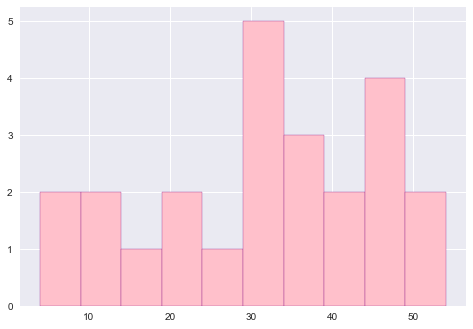

In [18]:
plt.hist(data['B'], color = 'pink', edgecolor = 'purple')


###### Кажется, не очень нормальное распределение(?)

### Квантильный график для проверки нормальности р-я зависимой величины:

Text(0.5, 1.0, '"B" quantile plot')

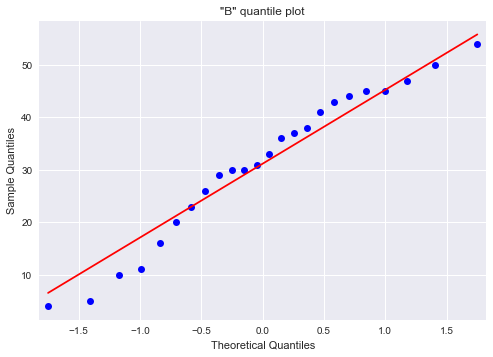

In [19]:

fig = plt.figure()
ax = fig.add_subplot()
sm.qqplot(data['B'], ax = ax, line='s')
ax.set_title ('"B" quantile plot')




###### Тут тоже вроде не совсем красиво, но, наверное, не критично(?)

### Плонтность распределения зависимой величины

<AxesSubplot:ylabel='Density'>

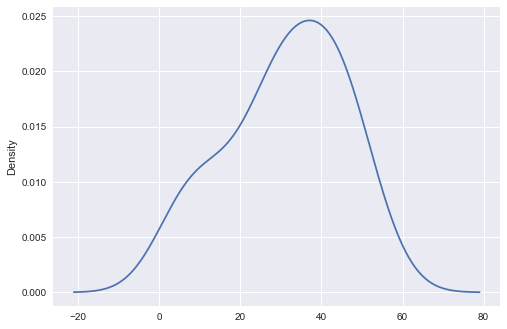

In [20]:
data['B'].plot(kind = 'density')

###### Здесь более менее красиво, навреное)

### Тест Шапиро-Вилка на нормальность распределения зависимой величины                                                                                                      (нулевая гипотеза - величина распределена нормально)

In [21]:

from scipy.stats import shapiro

shapiro(data['B'])

ShapiroResult(statistic=0.9536348581314087, pvalue=0.32417401671409607)

###### p_value>0,05, следовательно, нормальное распределение

### "Ящик с усами", ну или японские свечи (определяем статистические выбросы):

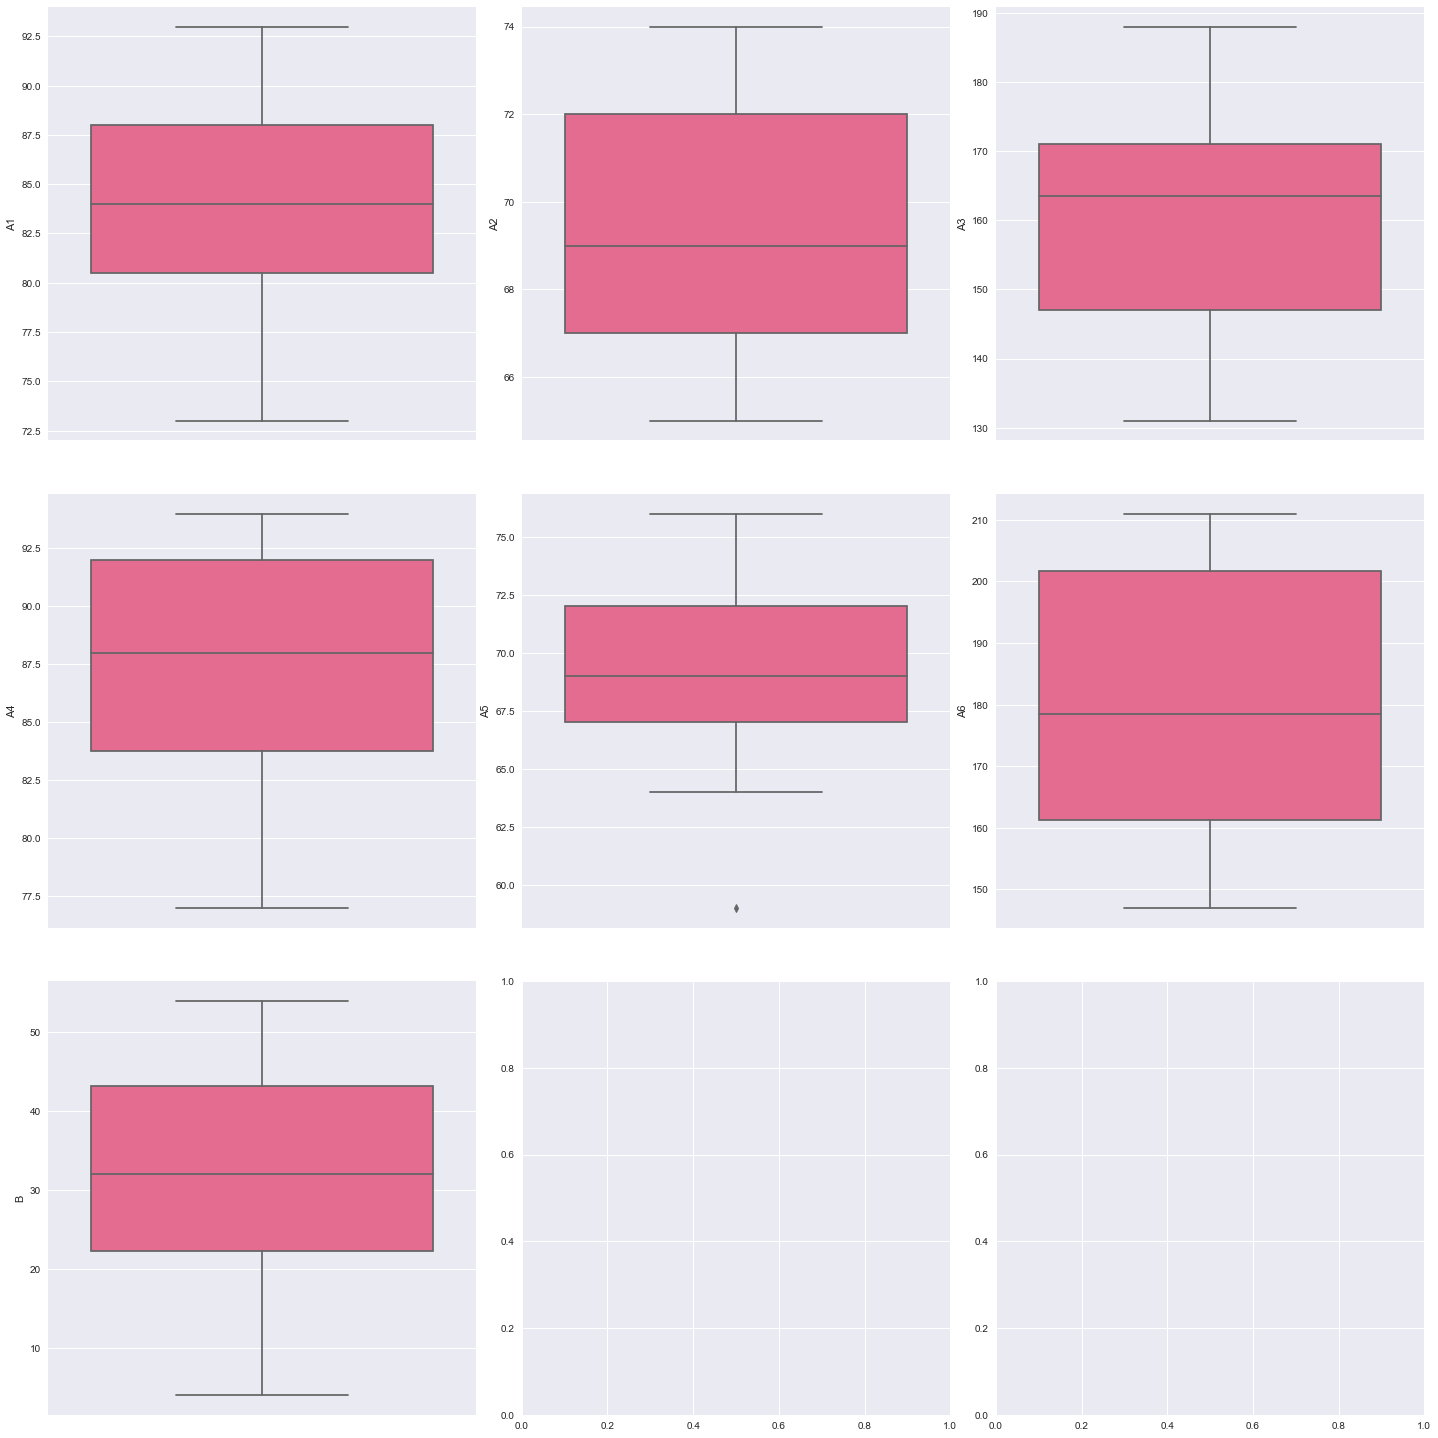

In [22]:

fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
index = 0
ax = ax.flatten()

for col, value in data.items():
    colors = ['#F85888']
    sns.boxplot(y=col, data=data, ax=ax[index], palette = colors)
    index +=1 
    plt.tight_layout(pad = 0.8, w_pad=0.5, h_pad=5.0)
    
   

###### Выброс в А5, далее устраним его

### Тепловая карта корреляции:

<AxesSubplot:>

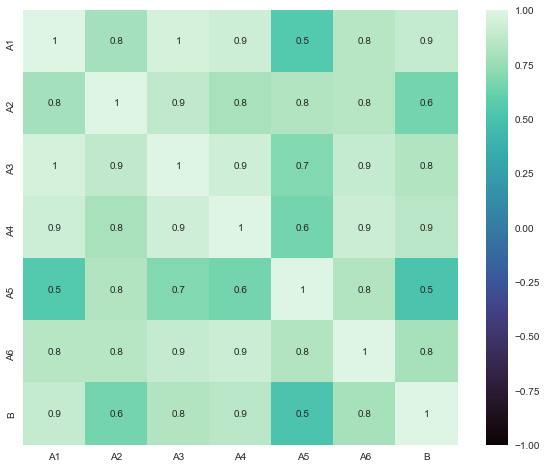

In [23]:

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True,fmt='.1g', vmin=-1, vmax=1, center= 0,cmap= 'mako',square=True)

###### Все много кореллируют)

### Убираем выбросы у А5

In [24]:
q75 = np.percentile(data['A5'], 75)
q25 = np.percentile(data['A5'], 25)

q10 = np.percentile(data['A5'], 10)
q90 = np.percentile(data['A5'], 90)

intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

data.loc[data['A5']<min, 'A5'] = q10
data.loc[data['A5']>max, 'A5'] = q90


### Повторно смотрим боксплот и тепловую карту корреляции

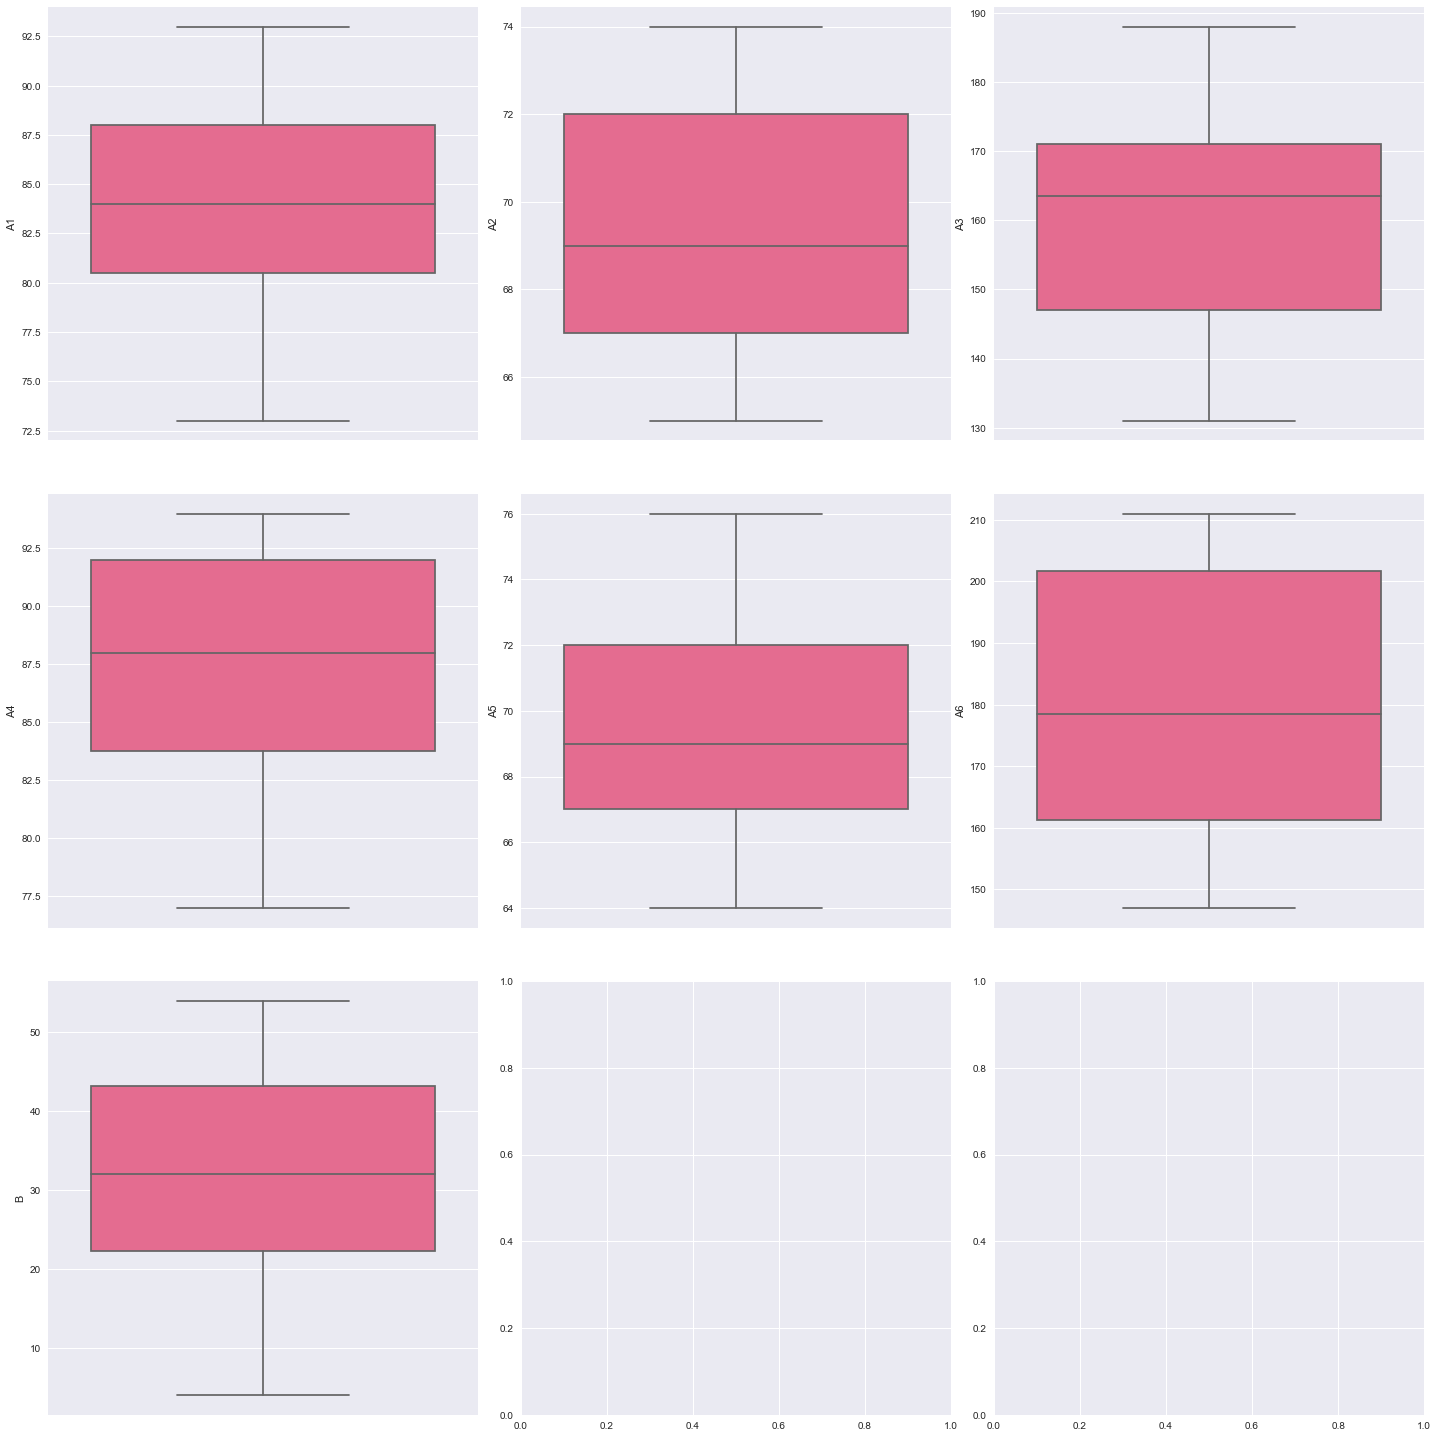

In [25]:
fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
index = 0
ax = ax.flatten()

for col, value in data.items():
    colors = ['#F85888']
    sns.boxplot(y=col, data=data, ax=ax[index], palette = colors)
    index +=1 
    plt.tight_layout(pad = 0.8, w_pad=0.5, h_pad=5.0)
    

<AxesSubplot:>

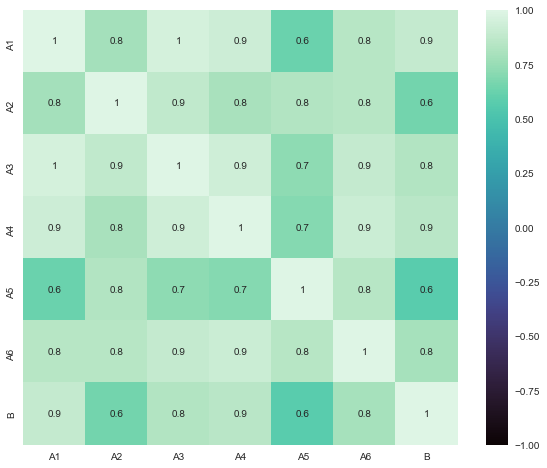

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True,fmt='.1g', vmin=-1, vmax=1, center= 0,cmap= 'mako',square=True)

#### Так как все сильно коррелирует, то выберем один столбец - А5 - минимальную температуру воздуха

### Проверяем совместное распределение зависимой величины и выбранных регрессоров:

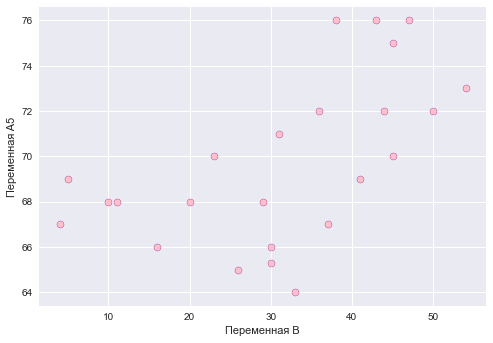

In [27]:
plt.scatter(data['B'], data['A5'], c='pink', edgecolor = 'purple')
plt.xlabel("Переменная B")
plt.ylabel("Переменная A5")
plt.show()

###### Здесь не наблюдается какого-либо сильного тренда

In [28]:
df=x_train
del df['A1']
del df['A2']
del df['A3']
del df['A4']
del df['A6']

In [29]:
X = df
X2 = sm.add_constant(X)
model= sm.OLS(y_train, X2)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     5.107
Date:                Mon, 20 Dec 2021   Prob (F-statistic):             0.0403
Time:                        15:04:49   Log-Likelihood:                -62.823
No. Observations:                  16   AIC:                             129.6
Df Residuals:                      14   BIC:                             131.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -131.6249     70.214     -1.875      0.0

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


###### Судя по значениям R-squared и Adj.R-squared, что это не очень хорошая модель - она плохо соотвествует данным

### Начинаем диагностику остаточных погрешностей

Text(0.5, 1.0, 'Q-Q plot')

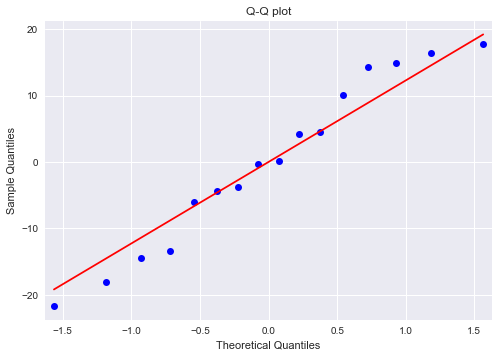

In [31]:
sm.ProbPlot(model.resid).qqplot(line='s')
plt.title('Q-Q plot')

### Распределение остаточных погрешностей

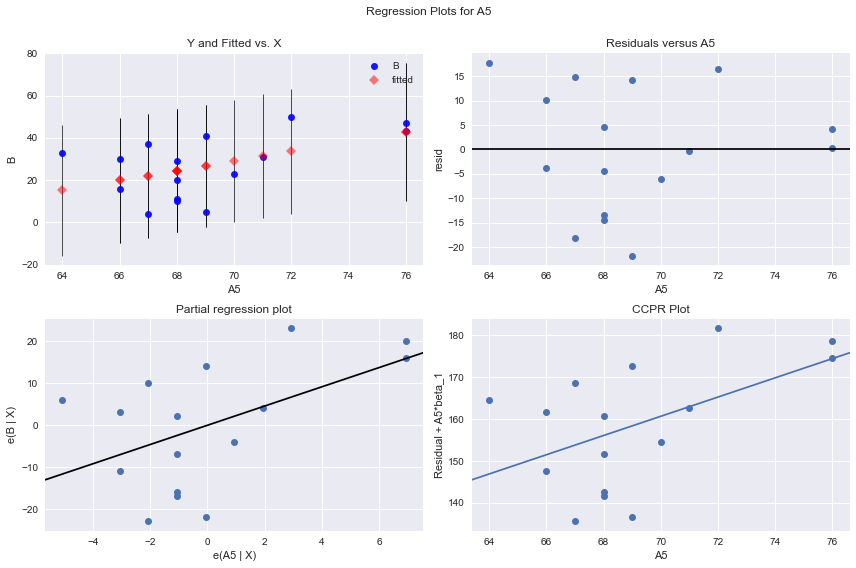

In [32]:
# model values
model_fitted_y = model.fittedvalues

# model residuals
model_residuals = model.resid

# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'A5', fig=fig)

### График дистанции Кука

In [33]:
np.set_printoptions(suppress=True)

#create instance of influence
influence = model.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)

(array([0.0975663 , 0.06781601, 0.00457013, 0.00822417, 0.04191935,
       0.04270623, 0.0065652 , 0.00003049, 0.04574547, 0.0000999 ,
       0.10109526, 0.11343508, 0.04206016, 0.04839115, 0.00483535,
       0.32134625]), array([0.90765347, 0.93473743, 0.99544178, 0.99181434, 0.95906701,
       0.95831717, 0.99345936, 0.99996951, 0.95542726, 0.99990011,
       0.9045007 , 0.89357431, 0.95893278, 0.95291969, 0.99517798,
       0.73038131]))


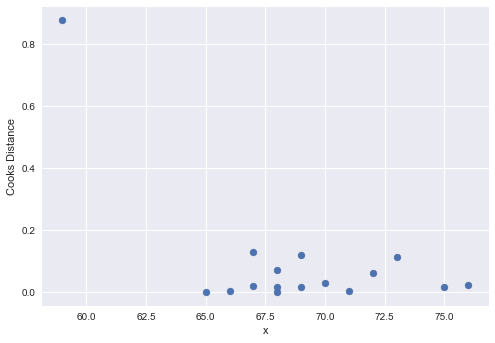

In [37]:
plt.scatter(df.A5, cooks[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'sqrt(abs(Residuals))')]

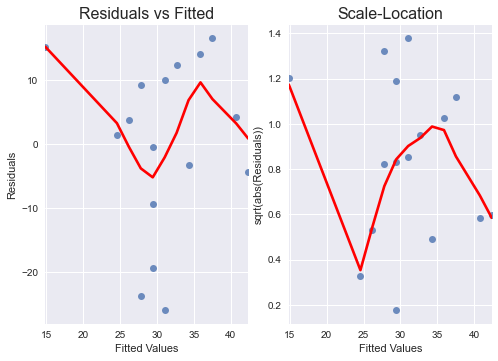

In [38]:

  
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    

### Тесты на нормальность распределения

In [44]:

from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

2.255436838146521

In [97]:
from scipy.stats import shapiro
shapiro(model.resid)

ShapiroResult(statistic=0.9256594181060791, pvalue=0.20792099833488464)

###### pvalue>0.05, следовательно, нормальное распределение 

In [99]:
from scipy.stats import kstest

kstest(model.resid, 'norm')


KstestResult(statistic=0.5623782568420244, pvalue=2.6639925048693746e-05)

In [30]:
print(model.params)

const   -131.624860
A5         2.295021
dtype: float64


$$B=-132+2.3\cdot A5$$